## Цель проекта и исходные данные

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализируйть результаты.

### Ход исследования:

Для данных таблицы  `hypothesis`:
* Применить фреймворк ICE для приоритизации гипотез.
* Примените фреймворк RICE для приоритизации гипотез.

Для данных таблиц `orders` и `visitors`: 
* Провести А/В тест имеющихся данных: 
    * Построить график кумулятивной выручки по группам. 
    * Построить график кумулятивного среднего чека по группам. 
    * Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
    * Построить график кумулятивной конверсии по группам. 
    * Построить график относительного изменения кумулятивной конверсии группы B к группе A. 
    * Построить точечный график количества заказов по пользователям.
    * Определить границы аномальных значений
    * Посчитать статистическую значимость различий в конверсии между группами по «сырым» и очищенным данным
    * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» и очищенным данным

### Описание данных

Файл `hypothesis`:

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

Файл `orders`:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `visitors`:
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

В исходной таблице `hypothesis` есть список гипотез, которые должны помочь увеличить выручку компании. Однако, поскольку гипотез несколько, а финансы и ресурсы ограничены, то необходимо с помощью разных фрэймворков (ICE, RICE) определить те гипотезы, над которыми стоит работать в первую очередь, т.е. провести приоритезацию гипотез. 

Посмотрим на исходную таблицу `hypothesis`

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
from scipy import stats as st
import seaborn as sns
from datetime import datetime as dt
pd.set_option('display.float_format', '{:.3f}'.format)
pd.options.display.max_colwidth = 100

In [9]:
def first_look(data, data_name):
    print('*' * 50)
    print(f'Первые строки таблицы {data_name}')
    display(data.head()) 
    print('Общая информация')
    print('*' * 50)
    data.info() 
    print('*' * 50)
    print('Описание данных')
    display(data.describe().T) 
    print('*' * 50)
    print('Количество дупликатов:', data.duplicated().sum()) #проверяем исходные данные на наличие дубликатов
    print('*' * 50)
    for column in data: #рассчитываем пропуски значений в каждой колонке
        print(column)
        a = data[column].count()
        b = len(data) 
        print(f'Количество пропусков:{b - a}')
        print(f'Процент пропусков ко всему датасету:{(b - a) / b:.1%}')
    print(50 * '*')
    print()
    print()
    return

In [10]:
first_look(hypothesis, 'hypothesis')

**************************************************
Первые строки таблицы hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Общая информация
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
**************************************************
Описание данных


,count,mean,std,min,25%,50%,75%,max
Reach,9.000,4.778,3.153,1.000,3.000,3.000,8.000,10.000
Impact,9.000,4.778,3.193,1.000,3.000,3.000,7.000,10.000
Confidence,9.000,5.556,3.046,1.000,3.000,7.000,8.000,9.000
Efforts,9.000,4.889,2.804,1.000,3.000,5.000,6.000,10.000


**************************************************
Количество дупликатов: 0
**************************************************
Hypothesis
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
Reach
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
Impact
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
Confidence
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
Efforts
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
**************************************************




Из обзора исходной таблицы видно, что у нас есть 9 гипотез, у которых выставлены параметры `Reach`, `Impact`, `Confidence`, `Effort`. Дублирующихся строчек нет, пропущенных значений тоже. Можно провести приоритизацию гипотез с помощью фреймфорков `ICE` и `RICE`. Рассчитаем приоритизацию по следующим формулам:

<img src="https://pictures.s3.yandex.net/resources/ice_score_2-27da3b9e-15cd-4f96-91a4-fefffd1d986e_1569198107.jpg" width=400 height=400 > 

Фреймворк ICE состоит из трех компонент:
`Impact` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
`Confidence` — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
`Effort` - затраченные усилия на тестирование гипотезы / простота гипотезы.

<img src="https://pictures.s3.yandex.net/resources/rice_score_1634305501.png" width=400 height=400> 

Фреймворк `RICE` состоит из четырёх компонент:
`Reach` — скольких пользователей затронет изменение, которое вы хотите внести;
`Impact` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
`Confidence` — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
`Efforts` — сколько стоит протестировать эту гипотезу.

In [16]:
hypothesis['ice_score']=(hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']

In [17]:
hypothesis['rice_score']=(hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']

In [18]:
hypothesis[['Hypothesis','ice_score']].sort_values(by='ice_score', ascending=False)

,Hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Как видно из полученной таблицы, наибольший балл ICE получили 3 гипотезы: 8, 0, 7 соответственно. Посмотрим на распределенение баллов по этим трем гипотезам.

In [20]:
hypothesis.loc[[0,7,8],['Hypothesis','Impact', 'Confidence', 'Efforts']]

,Hypothesis,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",10,8,6
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",9,9,5


Видно, что гипотеза 8  (`Запустить акцию, дающую скидку на товар в день рождения`) с наивысшим баллом ICE повлияет на пользователей достаточно сильно (`Impact` - 9 баллов), при этом уверенность в том, что это произойдет именно так высокая (`Confidence` - 9 баллов) и затраты на тестирование гипотезы средние (`Efforts` - 5 баллов). На втором месте по ICE score гипотеза 0 (`Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`) имеет больший балл влияния, однако уверенность при этом меньше, а затраты - больше. А у гипотезы 8 (`Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`) самый низкий балл по влиянию на пользователей, при достаточно высокой уверенности (8 баллов) и средней стоимости затрат (5 баллов).

Рассчитаем оценку RICE для гипотез и посмотрим как они распределяются с учетом параметра `Reach` (охват пользователей).


In [23]:
hypothesis[['Hypothesis','rice_score']].sort_values(by='rice_score', ascending=False)

,Hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


Как видно из полученной таблицы, наибольший балл RICE получили 4 гипотезы: 7, 2, 0, 6 соответственно. Из них только гипотезы 7 и 0 имеют высокий балл ICE. Посмотрим на распределенение баллов по этим четырем гипотезам и добавим также гипотезу 8, у которой был высокий показатель ICE.

In [25]:
hypothesis.loc[[0,2,6,7,8],['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts']]

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Из таблицы видно, что наши гипотезы  (0, 7, 8) с высоким бвллом ICE сильно отличаются по охвату пользователей (`Reach`). У гипотезы 7 самый высокий показатель охвата - 10 баллов, тогда как у гипотезы 0 и гипотезы 8 баллы охвата самые низкие (3 и 1 соответственно). Новые гипотезы, которые попали благодаря расчету RICE - 6 и 2 имеют низкий балл влияния на пользователей (3 балла), низкие затраты на тестирования (3 балла), достаточно высокую уверенность (7-8 баллов). Они различаются в большей степени по охвату пользователей: у 2 гипотезы высокий балл (8), а у 6 - средний (5). По коэффициенту ICE эти гипотезы близки и примерно в 2 раза меньше самого высокого балла ICE гипотезы 8 (16,2). 

### Выводы

На основании двух примененных фрэймворков (ICE и RICE), можно сказать что наиболее перспективная гипотеза `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок` (большой обхват пользователей - 10 баллов, влияние - 7 баллов, уверенность в гипотезе высокая - 8 баллов, затраты на проведение гипотезы средние - 5 баллов). Следующей можно рассматривать гипотезу `Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`, так как у нее хоть у низкий обхват пользователей, но с высокой уверенностью на них это окажет сильное влияние, и затраты на проведение гипотезы средние (6 баллов). И для этих 2 гипотезы рассчитанные баллы ICE и RICE одни из самых высоких среди других гипотез.

## Анализ A/B-теста

Компания предоставила данные для сравнения двух групп пользователей А и В (таблица `orders` и `visitors`). Необходимо определить, есть ли статистически значимые различия между конверсией и средним чеком групп А и В, а так же принять решение, надо ли продолжать эксперимент или можно принять решение по группам на основании имеющихся данных.

### Анализ исходных данных

Посмотрим на наши исходные данные

In [32]:
for i,j in zip([orders, visitors], ['orders', 'visitors']):
    first_look(i,j)

**************************************************
Первые строки таблицы orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Общая информация
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
**************************************************
Описание данных


,count,mean,std,min,25%,50%,75%,max
transactionId,1197.000,2155621385.530,1229084904.760,1062393.000,1166775572.000,2145193898.000,3237740112.000,4293855558.000
visitorId,1197.000,2165960143.099,1236014192.147,5114589.000,1111826046.000,2217984702.000,3177606451.000,4283872382.000
revenue,1197.000,8348.006,39191.132,50.000,1220.000,2978.000,8290.000,1294500.000


**************************************************
Количество дупликатов: 0
**************************************************
transactionId
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
visitorId
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
date
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
revenue
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
group
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
**************************************************


**************************************************
Первые строки таблицы visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Общая информация
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
**************************************************
Описание данных


,count,mean,std,min,25%,50%,75%,max
visitors,62.000,607.290,114.401,361.000,534.000,624.500,710.500,770.000


**************************************************
Количество дупликатов: 0
**************************************************
date
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
group
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
visitors
Количество пропусков:0
Процент пропусков ко всему датасету:0.0%
**************************************************




Как видно, в исходных данных нет дубликатов, пропущенных значений. Заголовки столбцов адекватные. Видно что столбец с датами имеет тип `object`, в столбце `revenue` таблицы `orders` очень большой разброс между минимальным (50) и максимальным (1294500) значениями.

В целом, данные в предобработке не нуждаются, перед проверкой A/B гипотезы проведем анализ данных А/А тестом

### А/А тест

Проверим данные в столбцах `group` в каждой таблице, убедимся, что значения распределены одинаково между двумя группами пользователей.

In [37]:
visitors['group'].value_counts()

group
A    31
B    31
Name: count, dtype: int64

In [38]:
ordersA=orders.query('group == "A"')
ordersB=orders.query('group == "B"')
print('Количество уникальных пользователей в группе А -', ordersA['visitorId'].nunique())
print('Количество уникальных пользователей в группе B -', ordersB['visitorId'].nunique())
print(round(((ordersB['visitorId'].nunique() - ordersA['visitorId'].nunique()) / ordersB['visitorId'].nunique() * 100), 2))

Количество уникальных пользователей в группе А - 503
Количество уникальных пользователей в группе B - 586
14.16


Мы получили, что в таблице `orders` количество уникальных пользователей в группе А равно 503, в группе В - 586 пользователей. Видно, что группами различаются больше, чем на 1%. Отсюда можно сделать вывод, что инструмент «деления» трафика работает не корректно, однако разница не настолько критична, чтобы останавливать исследование. 

Проверим, нет ли пользователей с одним и тем же ID в разных группах.

In [41]:
ordersA_=ordersA['visitorId']
ordersA_=ordersA_.drop_duplicates()
ordersB_=ordersB['visitorId']
ordersB_=ordersB_.drop_duplicates()
ordersA_.isin(ordersB_).value_counts()

visitorId
False    445
True      58
Name: count, dtype: int64

Как видно из выполнения условия, в группу B попали 58 уникальных пользователей группы А. 

Проверим ключевые метрики для групп

In [44]:
orders.groupby('group')['revenue'].agg(['mean', 'min','max'])

,mean,min,max
group,,,
A,7333.578,50,93940
B,9230.875,50,1294500


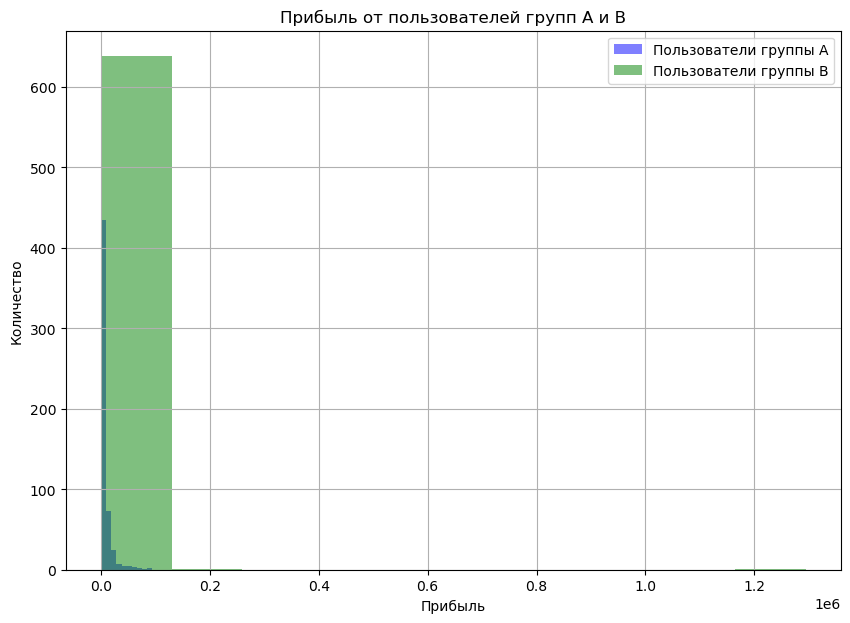

In [45]:
ax=ordersA.plot(
    y='revenue', 
    kind='hist',
    bins=10,
    alpha=0.5,
    color='blue',
    label='Пользователи группы А'
)
ordersB.plot(
    y='revenue', 
    kind='hist',
    bins=10,
    alpha=0.5,
    label='Пользователи группы B',
    title='Прибыль от пользователей групп А и В',
    color='green',
    ax=ax,
    grid=True,
    legend=True,
    figsize = (10,7)
)
ax.set_xlabel('Прибыль')
ax.set_ylabel('Количество')
plt.legend()
plt.show()

Из гистограммы видно, что для пользователей группы В значения распределены не равномерно и на результаты влияют аномальные значения (максимум выборки 1294500 приходится на пользователей группы В).

Проверим период проведения теста

In [48]:
print(f'''Период проведения теста в группе А: начало теста {ordersA['date'].min()}, конец теста {ordersA['date'].max()}, 
длительность теста {ordersA['date'].nunique()} день''')

print(f'''Период проведения теста в группе B: начало теста {ordersB['date'].min()}, конец теста {ordersB['date'].max()}, 
длительность теста {ordersB['date'].nunique()} день''')

Период проведения теста в группе А: начало теста 2019-08-01, конец теста 2019-08-31, 
длительность теста 31 день
Период проведения теста в группе B: начало теста 2019-08-01, конец теста 2019-08-31, 
длительность теста 31 день


#### Вывод 

Из проведенного анализа можно сделать вывод, что тест А/А по исходным данным не был проведен успешно, так как есть следующие нарушения: 

1. На результаты влияют аномалии и выбросы в исходных данных;
2. Инструмент «деления» трафика работает некорректно, так как в группу А попало меньше пользователей чем в группу В
3. В обе группы попали 58 уникальных пользователей.

Период тестирования в двух группах совпадает. Тест начался 1 августа 2019, закончился 31 августа, длился 31 день.

### График кумулятивной выручки по дням и по группам

Подготовим таблицу `cumulative_data`, в которой будут считаться: кумулятивная выручка, количество заказов, количество уникальных пользователей и количество посещений пользователей для каждой даты в каждой группе А и В

In [52]:
visitors['date'] = pd.to_datetime(visitors['date']).dt.date
orders['date'] = pd.to_datetime(orders['date']).dt.date
dates_groups = orders[['date', 'group']].drop_duplicates()

orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group']
    )]
    .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue': 'sum'}), axis = 1
).sort_values(by=['date', 'group'])

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group']
    )]
    .agg({'date':'max', 'group':'max', 'visitors': 'sum'}), axis = 1
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Проверим полученную таблицу, сверив даты начала и конца тестирования с исходными данными (тест начался 1 августа 2019, закончился 31 августа, длился 31 день).

In [54]:
checkA=cumulative_data.query('group == "A"')
checkB=cumulative_data.query('group == "B"')
print(f'''Период проведения теста в группе А: начало теста {checkA['date'].min()}, 
      конец теста {checkA['date'].max()}, длительность теста {len(checkA['date'])} день''')
print(f'''Период проведения теста в группе B: начало теста {checkB['date'].min()},
      конец теста {checkB['date'].max()}, длительность теста {len(checkB['date'])} день''')

Период проведения теста в группе А: начало теста 2019-08-01, 
      конец теста 2019-08-31, длительность теста 31 день
Период проведения теста в группе B: начало теста 2019-08-01,
      конец теста 2019-08-31, длительность теста 31 день


Как можно увидеть, даты проведения теста после объедъединения данных совпадают с исходными датами (начало 1 августа 2019, конец теста 31 августа), а значит таблица сформирована корректно.

Построим графики кумулятивной выручки по дням по группам

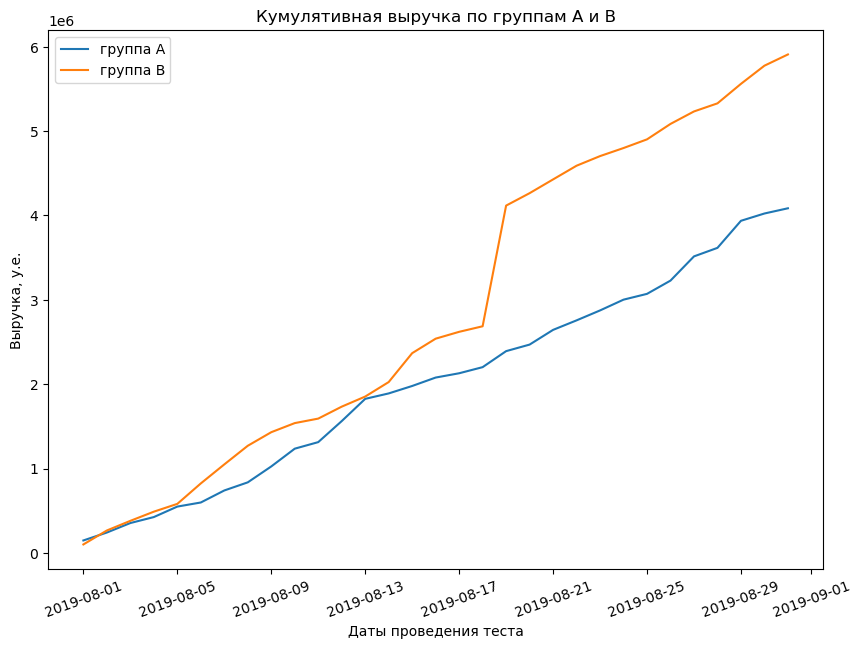

In [57]:
cumulative_revenueA = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue', 'orders']]

cumulative_revenueB = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,7))
plt.title('Кумулятивная выручка по группам А и В')
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='группа A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='группа B')
plt.xlabel('Даты проведения теста')
plt.ylabel('Выручка, у.е.')
plt.xticks(rotation=20)
plt.legend()
plt.show()


#### Вывод:
Как мы видим из графика, кумулятивная выручка группы В до середины теста шла примерно на одном уровне с группой А, однако после начался довольно резкий рост кумулятивной выручки группы В. К концу теста результат кумулятивной выручки группы В оказался больше результата группы А примерно в 1,5 раза. 

Похоже, на этот рост повлияли аномальные значения выручки в группе В, на которые мы обратили внимание при анализе данных.

### График кумулятивного среднего чека по дням

Построим для каждой группы графики кумулятивного среднего чека по дням:

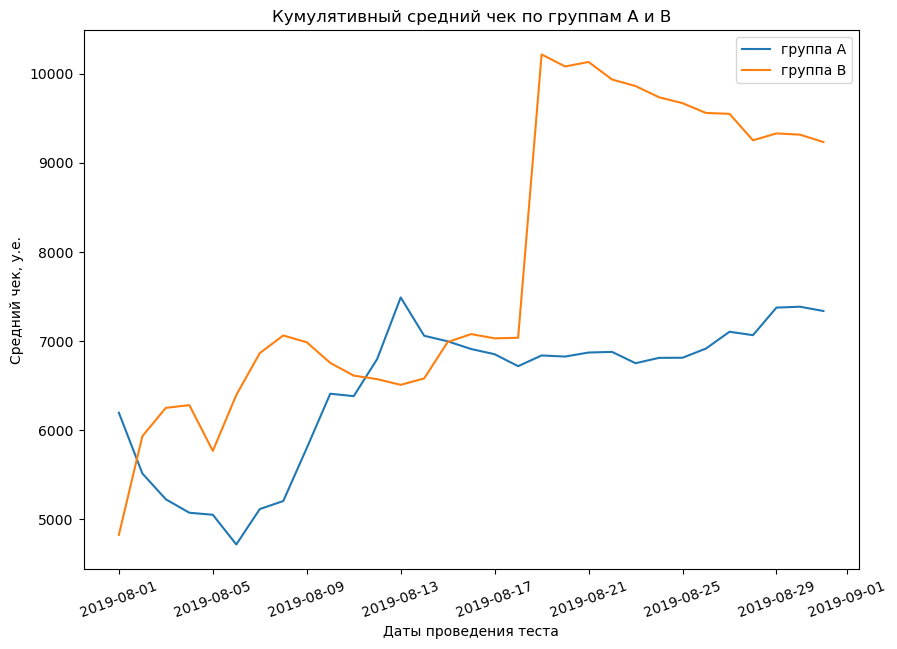

In [61]:
cumulative_revenueA = cumulative_data[cumulative_data['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulative_revenueB = cumulative_data[cumulative_data['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.figure(figsize=(10,7))
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['orders'], label='группа A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'], label='группа B')
plt.title('Кумулятивный средний чек по группам А и В')
plt.xlabel('Даты проведения теста')
plt.ylabel('Средний чек, у.е.')
plt.xticks(rotation=20)
plt.legend() 
plt.show()


#### Вывод

Из графиков видно, что у группы А был самый низкий кумулятивный средний чек 6 агуста 2019 (ниже 5000 у.е.), затем был рост, достигший пика в районе 7500 у.е. и затем кумулятивный средний чек был достаточно постоянен в районе 7000 у.е. 

При этом кумулятивный средний чек группы В рос с первого дня теста, затем в середине на несколько дней стабилизировался в районе 6500-7000 у.е. после чего с 18 августа был заметный скачок роста среднего чека практически в 1,5 раза в течение 1-2 дней, после чего кумулятивный средний чек группы В начал снижаться. К концу теста кумулятивный средний чек группы В превышает кумулятивный средний чек группы А примерно в 1,3 раза.

Такой резкий рост кумулятивного среднего чека в группе В показывает, что на результаты влияют аномальные значения выручки, поэтому прежде чем делать основные выводы требуется проанализировать данные без выбросов/аномальных значений

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

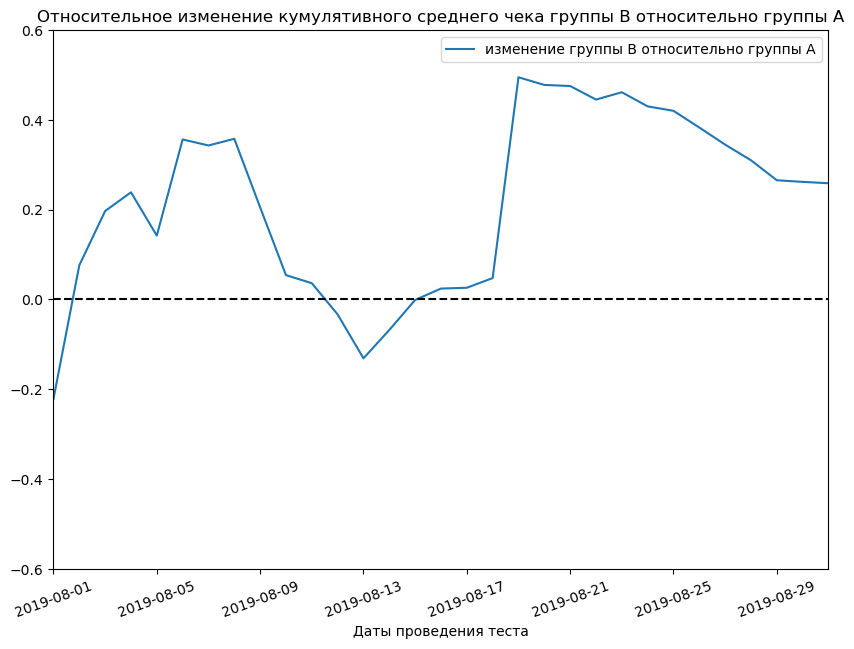

In [65]:
merged_cumulative_revenue = cumulative_revenueA.merge(
    cumulative_revenueB, 
    left_on='date', 
    right_on = 'date', 
    how = 'left', 
    suffixes = ['A','B']
)
plt.figure(figsize=(10,7))
plt.plot(
    merged_cumulative_revenue['date'], 
    (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(
        merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA']
    )-1,
    label="изменение группы B относительно группы A"
)
plt.title('Относительное изменение кумулятивного среднего чека группы B относительно группы A')
plt.xlabel('Даты проведения теста')
plt.xticks(rotation=20)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--') 
plt.axis([dt(2019, 8, 1), dt(2019, 8, 31), -0.6, 0.6])
plt.show()

#### Вывод

Как видно из графика относительного изменения кумулятивного среднего чека, в основном кумулятивный средний чек группы В выше группы А, однако заметно что результаты теста сильно изменились 18-19 августа, на что могут влиять аномальные значения. 

### График кумулятивной конверсии по дням и по группам

Построим графики кумулятивной конверсии по дням по группам:

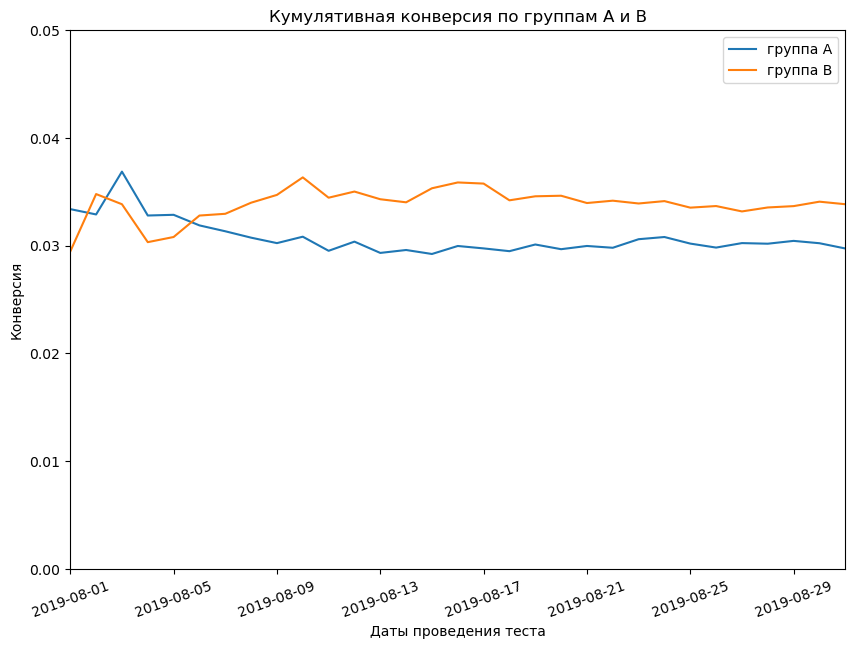

In [69]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_dataA = cumulative_data[cumulative_data['group'] == 'A']
cumulative_dataB = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize=(10,7))
plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label = 'группа A')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label = 'группа B')
plt.title('Кумулятивная конверсия по группам А и В')
plt.xlabel('Даты проведения теста')
plt.ylabel('Конверсия')
plt.xticks(rotation=20)
plt.legend()
plt.axis([dt(2019, 8, 1), dt(2019, 8, 31), 0, 0.05])
plt.show()

#### Вывод

Из полученных данных видно, что кумулятивная конверсия группы А до 6 августа была в целом выше конверсии группы В, после 6 августа кумулятивная конверсия группы В увеличилась и зафиксировалась, конверсия группы А просела и также зафиксировалась.

### График относительного различия кумулятивных конверсий

Построим график относительного различия кумулятивных конверсий:

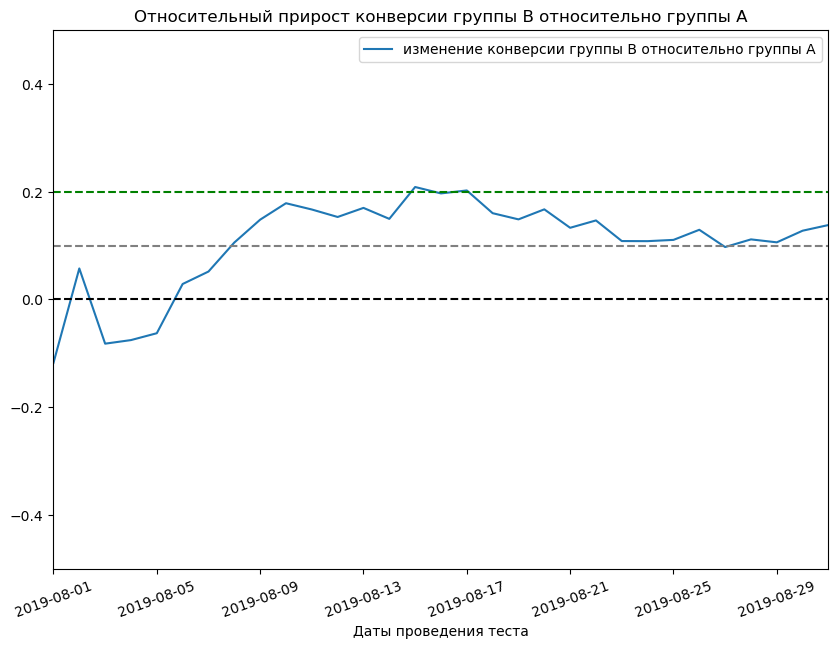

In [73]:
merged_сumulative_сonvrtns = cumulative_dataA[['date','conversion']].merge(
    cumulative_dataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)
plt.figure(figsize=(10,7))
plt.plot(merged_сumulative_сonvrtns['date'], 
         merged_сumulative_сonvrtns['conversionB']/merged_сumulative_сonvrtns['conversionA']-1, 
         label="изменение конверсии группы B относительно группы A")
plt.legend()
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Даты проведения теста')
plt.xticks(rotation=20)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='green', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt(2019, 8, 1), dt(2019, 8, 31), -0.5, 0.5])
plt.show()

#### Вывод:

Почти с самого начала теста группа В лидирует по конверсии. К середине теста конверсия группы В относительно группы А достигает 20%, однако к концу теста конверсия группы В снизилась примерно до 10% относительно группы А

### Аномальные значения заказов

Построим точечный график распределения числа заказов по пользователям:

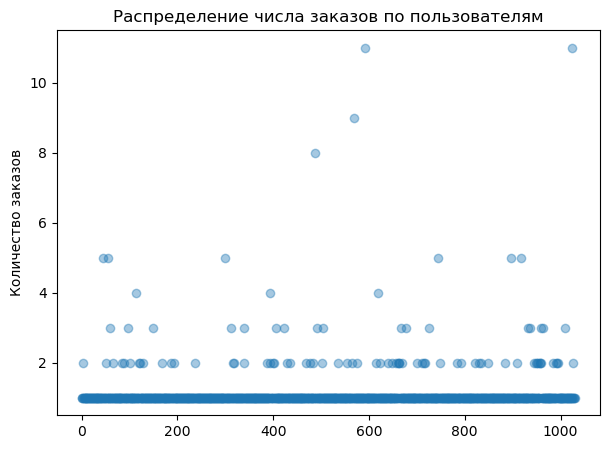

In [77]:
ax = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId':'nunique'})
)
ax.columns = ['userId','orders']
x_values = pd.Series(range(0, len(ax)))
plt.figure(figsize=(7,5))
plt.scatter(x_values, ax['orders'], alpha = 0.4)
plt.title('Распределение числа заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

Посчитаем 95-й и 99-й выборочные перцентили количества заказов по пользователям: 

In [79]:
np.percentile(ax['orders'], [95,99])

array([2., 4.])

#### Вывод:

Из точечного графика распределения числа заказов по пользователям видно, что в основном пользователи сделали 1-2 заказа. Пользователей, которые сделали 4 и более заказов, достаточно мало. Их скорее можно считать аномальными, чем стандартными для данной выборки.

Из полученных перцентелей видно, что не более 5% пользователей сделали 2 и более заказа, и 1% пользователей сделали 4 и более заказов. Для того, чтобы исключить аномальных пользователей выберем границу в 99-й перцентель и исключим пользователей, которые сделали 4 и более заказов.

### Аномальные значения выручки

Построим точечный график стоимости заказов

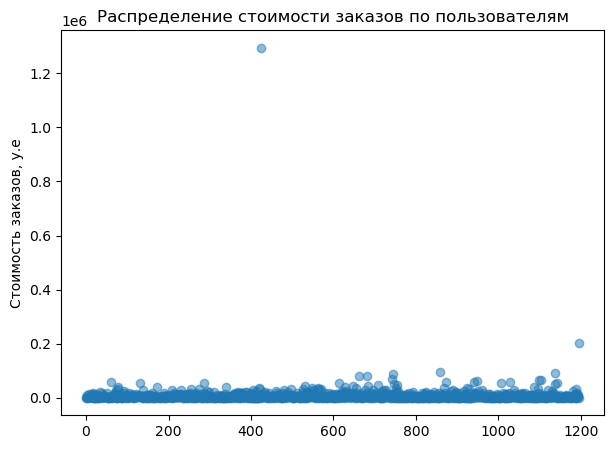

In [83]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(7,5))
plt.scatter(x_values, orders['revenue'], alpha = 0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.ylabel('Стоимость заказов, у.е')
plt.show()

Наглядно оценить данные мешают выбросы, поэтому посмотрим на тот же график, только со стоимостью заказа менее 200 тыс у.е.

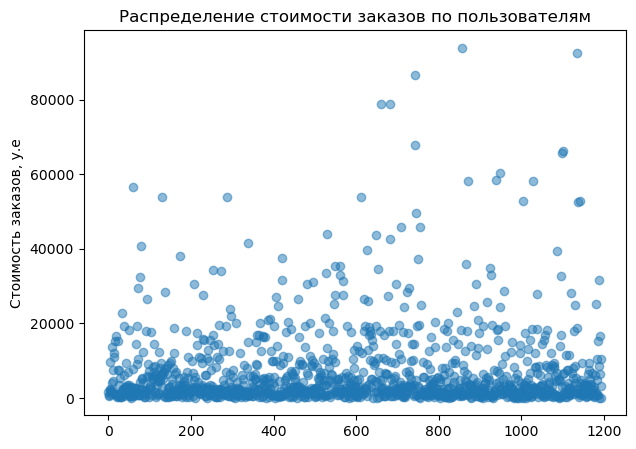

In [85]:
orders_new = orders.query('revenue < 200000')
x_values = pd.Series(range(0, len(orders_new['revenue'])))
plt.figure(figsize=(7,5))
plt.scatter(x_values, orders_new['revenue'], alpha = 0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.ylabel('Стоимость заказов, у.е')
plt.show()

Как видно из графика без аномальных значений, в основном стоимость заказов расположена между 0 и 40000 у.е. Для проверки данных, рассчитаем перцентили стоимости заказов.

Посчитаем 95-й и 99-й выборочные перцентили стоимости заказов: 

In [88]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

#### Вывод: 

Из точечного графика стоимостей заказов видно, что в основном заказы стоят до 100 тыс у.е. И видно, что совсем мало заказов выше этой границы. Заказ выше 1 200 000 у.е. исключительный, поэтому можно сделать вывод, что это точно аномальное значение.

Из полученных перцентелей видно, что не более 5% пользователей сделали заказ стоимостью больше 28 тыс у.е. и 1% пользователей оплатили заказ на сумму более 58 тыс у.е. Для того, чтобы исключить аномальных пользователей выберем границу в 58 тыс у.е. (исключим 1% пользователей)

### Статистическая значимость по "сырым" данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Для этого подготовим данные для анализа

In [92]:
visitorsA = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsA.columns = ['date', 'visitors_per_dateA']

visitorsA_cummulative = visitorsA.apply(
    lambda x: visitorsA[visitorsA['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dateA': 'sum'}
    ),
    axis=1,
)
visitorsA_cummulative.columns = ['date', 'visitorsA_cummulative']

visitorsB = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsB.columns = ['date', 'visitors_per_dateB']

visitorsB_cummulative = visitorsB.apply(
    lambda x: visitorsB[visitorsB['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dateB': 'sum'}
    ),
    axis=1,
)
visitorsB_cummulative.columns = ['date', 'visitorsB_cummulative']

ordersA = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersA.columns = ['date', 'orders_per_dateA', 'revenue_per_dateA']

ordersA_cummulative = ordersA.apply(
    lambda x: ordersA[ordersA['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dateA': 'sum', 'revenue_per_dateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersA_cummulative.columns = [
    'date',
    'ordersA_cummulative',
    'revenueA_cummulative',
]

ordersB = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersB.columns = ['date', 'orders_per_dateB', 'revenue_per_dateB']

ordersB_cummulative = ordersB.apply(
    lambda x: ordersB[ordersB['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dateB': 'sum', 'revenue_per_dateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersB_cummulative.columns = [
    'date',
    'ordersB_cummulative',
    'revenueB_cummulative',
]

data = (
    ordersA.merge(
        ordersB, left_on='date', right_on='date', how='left'
    )
    .merge(ordersA_cummulative, left_on='date', right_on='date', how='left')
    .merge(ordersB_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsA, left_on='date', right_on='date', how='left')
    .merge(visitorsB, left_on='date', right_on='date', how='left')
    .merge(visitorsA_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsB_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,orders_per_dateA,revenue_per_dateA,orders_per_dateB,revenue_per_dateB,ordersA_cummulative,revenueA_cummulative,ordersB_cummulative,revenueB_cummulative,visitors_per_dateA,visitors_per_dateB,visitorsA_cummulative,visitorsB_cummulative
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 
Сформулируем гипотезы
* Нулевая гипотеза (Н0): различий в конверсии между группами нет. 
* Альтернативная гипотеза (H1): различия в конверсии между группами есть.

In [94]:
orders_usersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_usersA.columns = ['userId', 'orders']

orders_usersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_usersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        orders_usersA['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitors_per_dateA'].sum() - len(orders_usersA['orders'])),
            name='orders',
        ),
    ],
    axis=0
)

sampleB = pd.concat(
    [
        orders_usersB['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitors_per_dateB'].sum() - len(orders_usersB['orders'])),
            name='orders',
        ),
    ],
    axis=0
)

print('p-value:', '{0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост конверсии B -','{0:.1%}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительный прирост конверсии B - 13.8%


**Вывод**: 
Первое число — p-value = 0.017 меньше уровня значимости 0.05. Значит, нулевую гипотезу отвергаем. Т.е. статистически значимые различия в конверсии между группами есть. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%.

Посчитаем статистическую значимость различия средних чеков между группами. 
* Нулевая гипотеза: различий в среднем чеке между группами нет. 
* Альтернативная гипотеза: различия в среднем чеке между группами есть.


In [97]:
print('p-value:', '{0:.3f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                    orders[orders['group']=='B']['revenue'])[1])
     )
print('Относительный прирост среднего чека группы B -','{0:.1%}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
     ) 

p-value: 0.729
Относительный прирост среднего чека группы B - 25.9%


**Вывод**: P-value = 0.729, больше уровня значимости 0.05. Значит, статистически значимых различий в среднем чеке между группами нет. Однако мы видим, что относительное различие среднего чека группы В к среднему чеку группы А равно 25.9%. Видимо, на результат относительного различия средних значений влияют аномальные значения выручки, поэтому нужно делать выводы по очищенным данным

#### Вывод:

По сырым данным можно сделать вывод, что:
* 1. Есть статистически значимые различия в конверсии между группами А и В. 
* 2. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%
* 3. Статистически значимых различий в среднем чеке между группами нет.
* 4. Относительное различие среднего чека группы В к среднему чеку группы А равно 25.9%, видимо на это значение влияют аномальные значение в выручке

### Статистическая значимость по "очищенным" данным

Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58 тыс у.е.. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами.

In [102]:
users_many_orders= pd.concat(
    [
        orders_usersA[orders_usersA['orders'] >= 4]['userId'],
        orders_usersB[orders_usersB['orders'] >= 4]['userId'],
    ],
    axis=0,
)
users_expensive_orders = orders[orders['revenue'] > 58000]['visitorId']
abnormal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
abnormal_users.shape[0]

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
dtype: int64

20

Всего нашлось 20 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по "очищенным" данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:


In [104]:
sampleA_filtered = pd.concat(
    [
        orders_usersA[
            np.logical_not(orders_usersA['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_dateA'].sum() - len(orders_usersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB_filtered = pd.concat(
    [
        orders_usersB[
            np.logical_not(orders_usersB['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_dateB'].sum() - len(orders_usersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [105]:
print('p-value:', '{0:.3f}'.format(st.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print('Относительный прирост конверсии B -','{0:.1%}'.format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))

p-value: 0.014
Относительный прирост конверсии B - 15.1%


Результаты по конверсии практически не изменились. У "сырых" данных p_value был 0.017, а у "очищенных" - 0.014, , а относительный прирост конверсии группы В к конверсии группы А у "сырых" данных был равен 13.8%, тогда как у "очищенных" - 15.1%

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным.

In [108]:
print('p-value:','{0:.3f}'.format(
        st.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы B -','{0:.1%}'.format(
        orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.959
Относительный прирост среднего чека группы B - -1.4%


P-value увеличился c 0.729 по "сырым" данным до 0.959, что также подтверждает (больше уровня значимости 0.05), что статистически значимых различий в среднем чеке между группами нет, но при этом относительная разница между группами А и В существенно сократилась с 25,9% по "сырым" данным до - 1,4% по "очищенным" данным. Это значит, что аномалии действительно влияли на относительную разницу между группами.

#### Вывод:

По "очищенным" данным можно сделать вывод, что:
* 1. Есть статистически значимые раздичия в конверсии между группами А и В. 
* 2. Относительный прирост конверсии группы В к конверсии группы А изменился и стал равным 15.1%
* 3. Статистически значимых различий в среднем чеке между группами нет.
* 4. Относительное различие среднего чека группы В к среднему чеку группы А уменьшилось и стало равно -1,4%. Значит "очищенные " данные стали лучше

### Общий вывод:
 
* Есть статистически значимое различие по конверсии группы В и конверсии группы А и В как по «сырым» данным, так и по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что конверсия пользователей группы B лучше группы A
* Относительный прирост конверсии группы В к конверсии группы А равен от 13.8% ("сырые" данные) до 15.1% ("очищенные" данные) 
* Нет статистически значимого различия по среднему чеку между группами А и В ни по «сырым», ни по данным после фильтрации аномалий
* На относительную разницу среднего чека между группами влияли аномальные значения выручки в группах

По полученным результатам можно остановить тест и выбрать группу В, так как несмотря на то, что различия в среднем чеке между группами нет, пользователи группы В конвертируются лучше пользователей группы А и кумулятивная конверсия в группы В выглядит стабильнее. 